In [1]:
# Harbinger Package
# version 1.0.9

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Loading required package: harbinger

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘ggplot2::margin’ by ‘randomForest::margin’ when loading ‘harbinger’”

Attaching package: ‘harbinger’


The following object is masked from ‘package:stats’:

    optimize


The following object is masked from ‘package:base’:

    transform




In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[5]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,0.00,FALSE
2,0.25,FALSE
3,0.50,FALSE
4,0.75,FALSE
5,1.00,FALSE
6,1.25,FALSE


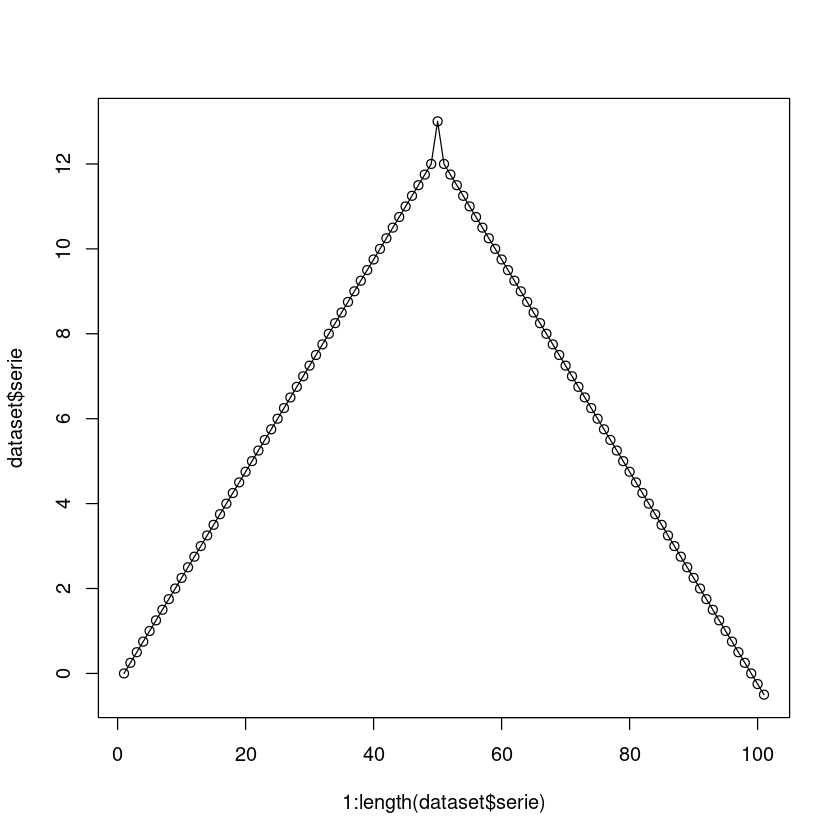

In [4]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change point method 
  model <- change_point(sw=30)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event         type
1   43  TRUE change_point
2   44  TRUE change_point
3   45  TRUE change_point
4   46  TRUE change_point
5   47  TRUE change_point
6   48  TRUE change_point
7   49  TRUE change_point
8   50  TRUE change_point
9   51  TRUE change_point
10  52  TRUE change_point
11  53  TRUE change_point
12  54  TRUE change_point
13  55  TRUE change_point
14  56  TRUE change_point


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     13   
FALSE     0     87   


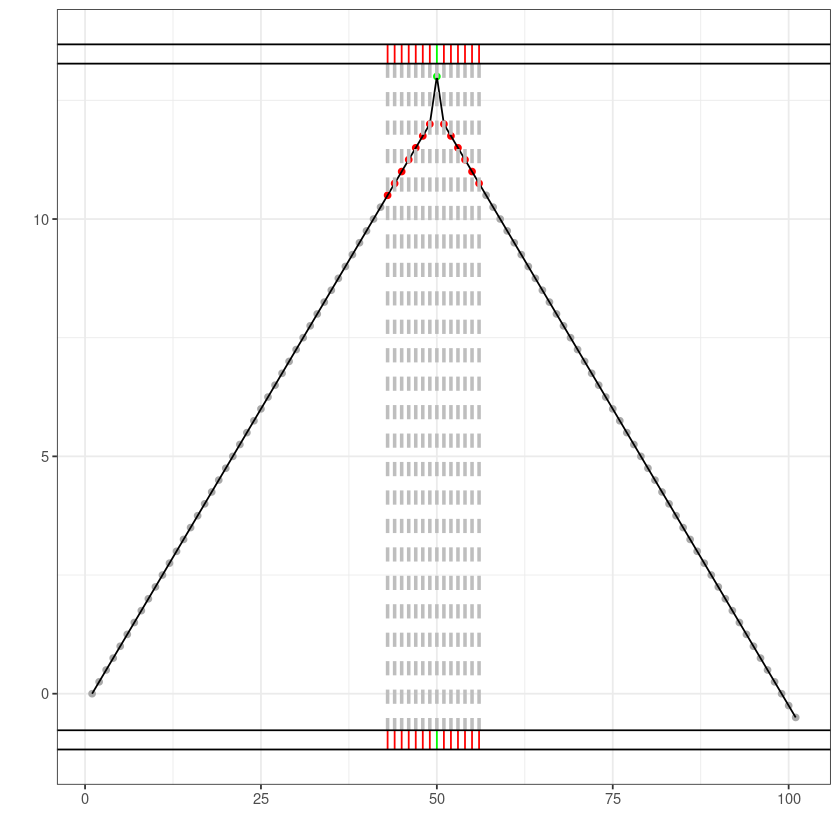

In [10]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)